In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import getweather

def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)
    
    return np.interp(x, x[good], array[good])

In [3]:
hilo = getweather.getyear('HILO', ['TMIN', 'TMAX'], 2000)

In [4]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [5]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(19.102739726027398, 14.4, 23.3)

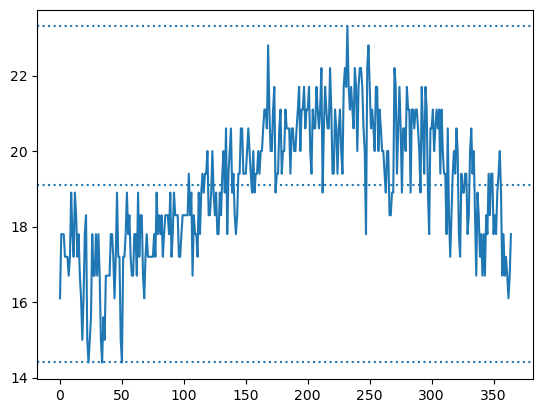

In [6]:
plt.plot(hilo['TMIN'])

for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    plt.axhline(value, linestyle=':')

In [7]:
mean, err = np.mean(hilo['TMIN]), math.sqrt(np.var(hilo['TMIN']))

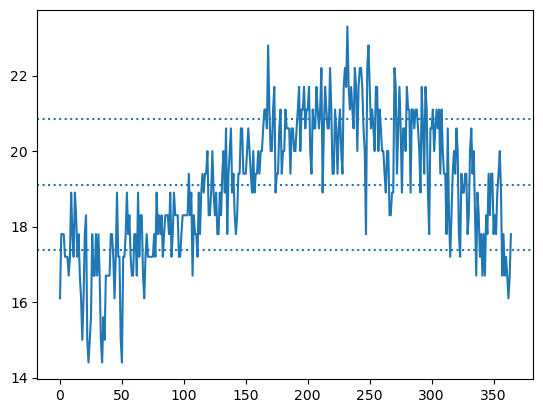

In [8]:
plt.plot(hilo['TMIN'])

for value in [mean, mean - err, mean + err]:
    plt.axhline(value, linestyle=':')

In [9]:
rain = getweather.getyear('HILO', ['PRCP'], 2023)['PRCP']

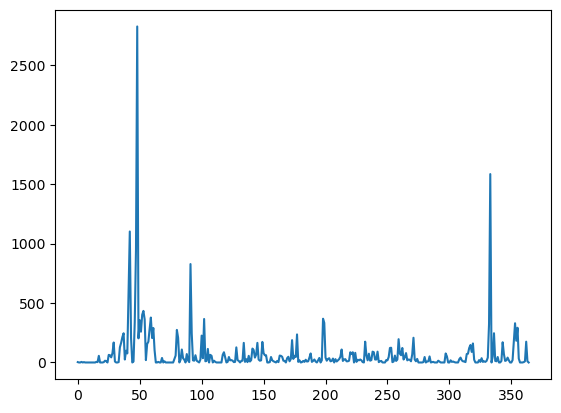

In [10]:
plt.plot(rain)

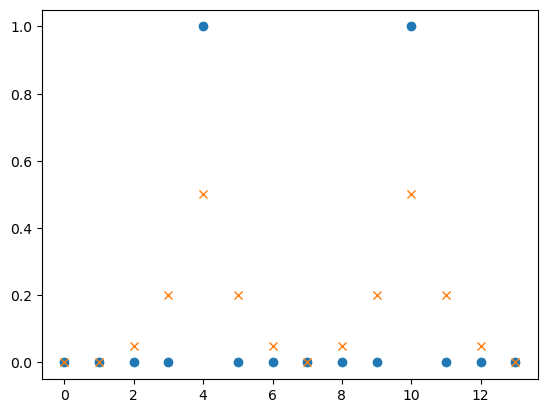

In [11]:
x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])


# add in second stage
mask = np.array([0.05,0.2,0.5,0.2,0.05])
y = np.correlate(x, mask, 'same')

plt.plot(x, 'o')

plt.plot(y, 'x')

In [12]:
np.ones(10) / 10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

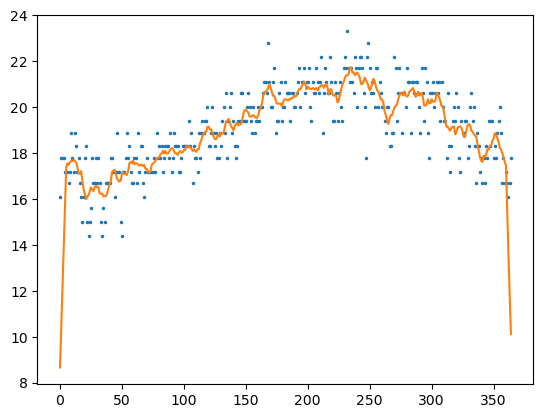

In [13]:
plt.plot(hilo['TMIN'], '.', ms=3)
plt.plot(np.correlate(hilo['TMIN'], np.ones(10) / 10, 'same'))

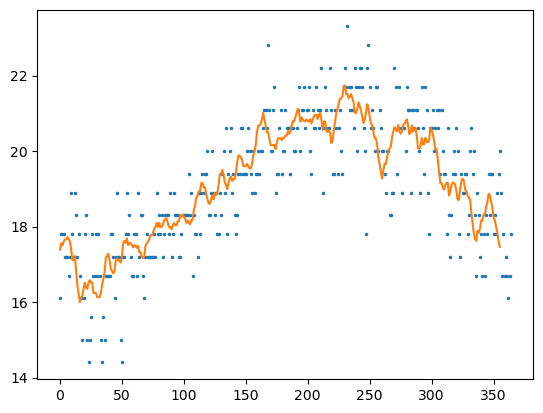

In [14]:
plt.plot(hilo['TMIN'], '.', ms=3)
plt.plot(np.correlate(hilo['TMIN'], np.ones(10) / 10, 'valid'))

In [30]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

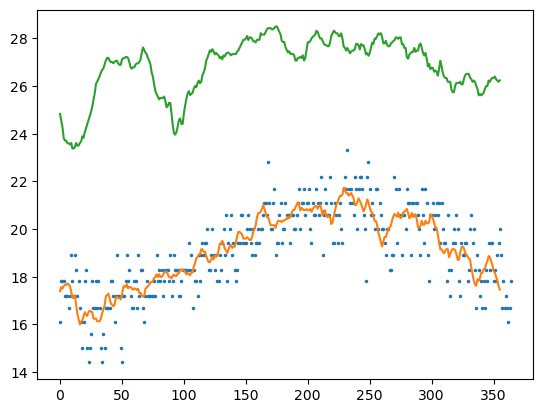

In [31]:
plt.plot(hilo['TMIN'], '.', ms=3)
plt.plot(smooth(hilo['TMIN'], 10))

plt.plot(smooth(hilo['TMAX'], 10))

In [33]:
def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    for obs in ['TMIN', 'TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])

        plt.plot(stationdata[obs], '.', ms=1)
        plt.plot(range(10,356), smooth(stationdata[obs], 20))

    plt.title(station)
    plt.axis(xmin=1, xmax=365, ymin=10, ymax=45)

(1.0, 365.0, 15.0, 30.0)

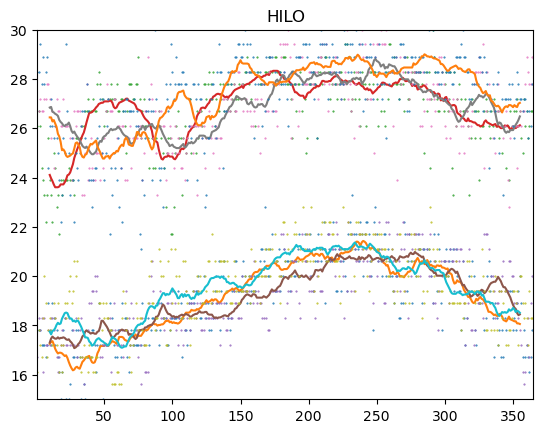

In [34]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

plt.axis(ymin=15, ymax=30)

Using ('USW00014764', 43.6425, -70.3045, 13.4, 'ME', 'PORTLAND JETPORT', '', 'HCN', '72606').


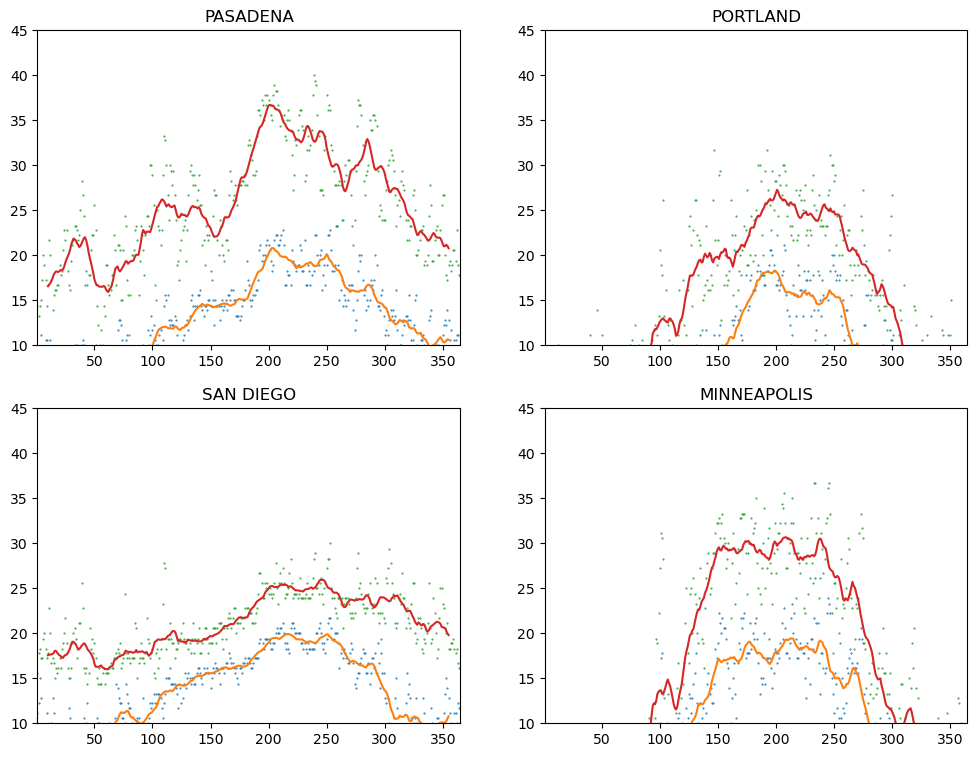

In [47]:
plt.figure(figsize=(12,9))

for i, city in enumerate(['PASADENA', 'PORTLAND', 'SAN DIEGO', 'MINNEAPOLIS']):
    plt.subplot(2,2,i+1)    
    plotsmooth(city, 2023)